## Проект по курсу "Библиотеки Python для Data Science" GeekBrains

#### Факультет: Geek University Искусственного интеллекта
#### Студент: Сальников Роман Алексеевич

### Тема: Построение модели машинного обучения по предсказанию стоимости недвижимости

Для начала работы импортируем необходимые библиотеки, подключаем предупреждения и задаём конфигурации

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})

Укажем пути к файлам с данными

In [2]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
SUBMIT_DATASET_PATH = 'sample_submission.csv'

##### Описание датасетов

**Id** - идентификационный номер квартиры

**DistrictId** - идентификационный номер района

**Rooms** - количество комнат в квартире

**Square** - общая площадь квартиры

**LifeSquare** - жилая площадь

**KitchenSquare** - площадь кухни

**Floor** - этаж

**HouseFloor** - количество этажей в доме

**HouseYear** - год постройки дома

**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности

**Social_1, Social_2, Social_3** - социальные показатели местности

**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья

**Shops_1, Shops_2** - показатели, связанные с наличием магазинов и торговых центров поблизости

**Price** - цена квартиры

Загрузка и просмотр данных обучающего датасета

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [6]:
train_df.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9990,10635,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700
9991,11173,6,2.0,62.648779,NaN,0.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,182625.548872
9992,11753,37,2.0,50.902724,27.159548,6.0,4,9.0,1972,0.127812,B,B,28,7287,5,320.0,1,3,B,196641.468817
9993,9289,1,3.0,84.486078,88.931509,0.0,4,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,264213.558631
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,B,B,25,5648,1,30.0,2,4,B,136744.340827
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


Типы данных в обучающем датасете

In [7]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Идентификационный номер квартиры и идентификационный номер района необходимо убрать из вещественных признаков

In [8]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

Основные статистики тренировочного датасета

In [9]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


1. Имеются пропуски данных у признаков LifeSquare и Healthcare_1. 
2. Имеются выбросы по минимальному значению у признаков Rooms и HouseFloor.
3. Необходимо проверить на выбросы следующие признаки Rooms, Square, LifeSquare, KitchenSquare, HouseYear, Square, LifeSquare

In [10]:
num_features = train_df.select_dtypes(include=['float64', 'int64'])

j=0
for i in num_features:
    print('Количество уникальных значений признака ' + i + '\n')
    print(train_df[i].value_counts())
    j+=1
    print()

Количество уникальных значений признака Rooms

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

Количество уникальных значений признака Square

52.327165    1
34.785487    1
45.823093    1
57.607965    1
57.925603    1
            ..
60.776683    1
72.956943    1
51.770111    1
41.843220    1
64.226361    1
Name: Square, Length: 10000, dtype: int64

Количество уникальных значений признака LifeSquare

20.151696    1
28.241964    1
23.884805    1
51.826876    1
47.972602    1
            ..
45.455722    1
50.458505    1
42.172028    1
21.993610    1
27.598712    1
Name: LifeSquare, Length: 7887, dtype: int64

Количество уникальных значений признака KitchenSquare

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0      

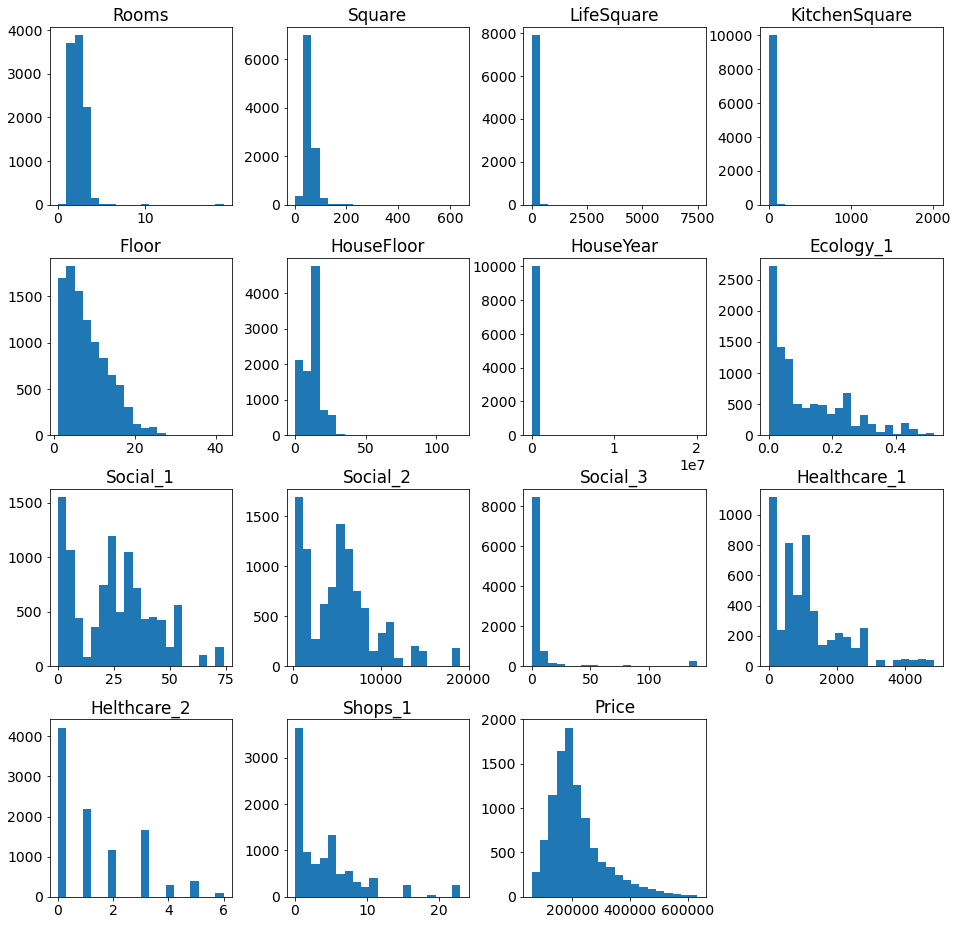

In [11]:
train_df.hist(figsize=(16,16), bins=20, grid=False)
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)
plt.show()

1. Для лучшего обучения модели будем считать нормальным количество комнат в квартире от 1 до 5.
2. Признак Square имеет аномалию по нулевому значению.
3. Большие выбросы в признаках LifeSquare и KitchenSquare необходимо будет очистить.
4. Гипотетически в признаке HouseFloor может быть нулевой этаж, но для лучшего обучения модели установим минимальное значени 1.
5. В признаке HouseYear установим ограничение по сегодняшний день.
6. В признаке Social_3 небольшой выброс в хвосте.
7. В признаке Healthcare_1 имеются пропуски и для лучшего обучения удалим его.

In [12]:
obj_features = train_df.select_dtypes(include=['object'])

for i in obj_features:
    print('Количество уникальных значений признака ' + i + '\n')
    print(train_df[i].value_counts())
    print()

Количество уникальных значений признака Id

6842     1
2225     1
7567     1
11279    1
8793     1
        ..
8977     1
10144    1
4482     1
10063    1
11898    1
Name: Id, Length: 10000, dtype: int64

Количество уникальных значений признака DistrictId

27     851
1      652
23     565
6      511
9      294
      ... 
174      1
209      1
205      1
207      1
117      1
Name: DistrictId, Length: 205, dtype: int64

Количество уникальных значений признака Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64

Количество уникальных значений признака Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64

Количество уникальных значений признака Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64



Номинативные признаки без выбросов и аномалий, следовательно их можно считать категориальными.

Целевая переменная - Price. 
Для детального ознакомления постоим графики распределения и корреляций.

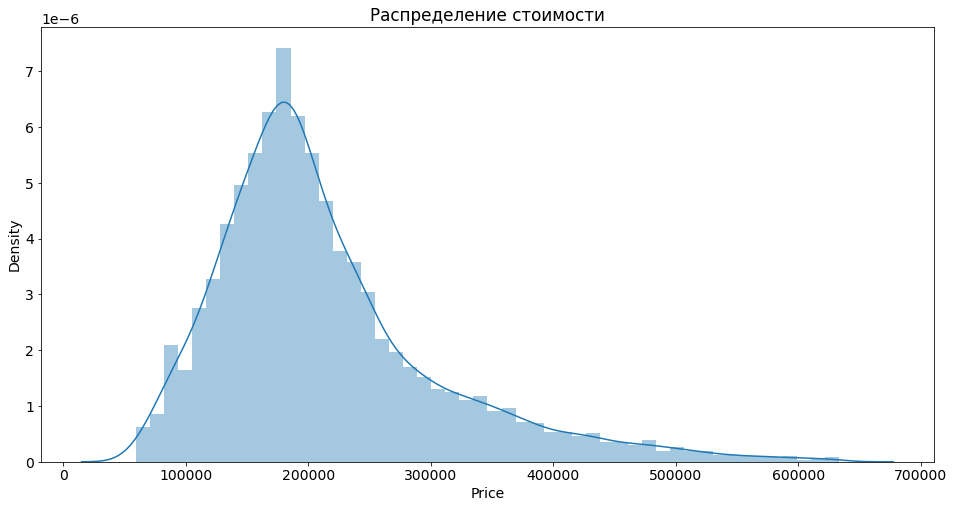

In [13]:
plt.figure(figsize = (16, 8))

sns.distplot(train_df['Price'])

plt.title('Распределение стоимости')
plt.show()

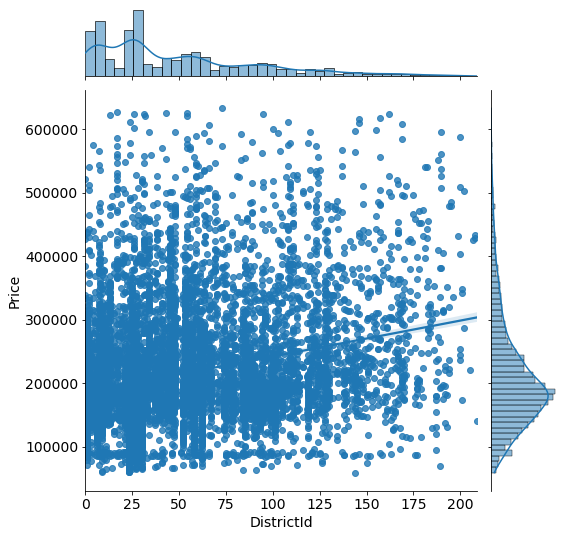

In [14]:
train_df['DistrictId'] = train_df['DistrictId'].astype(int)
grid = sns.jointplot(train_df['DistrictId'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

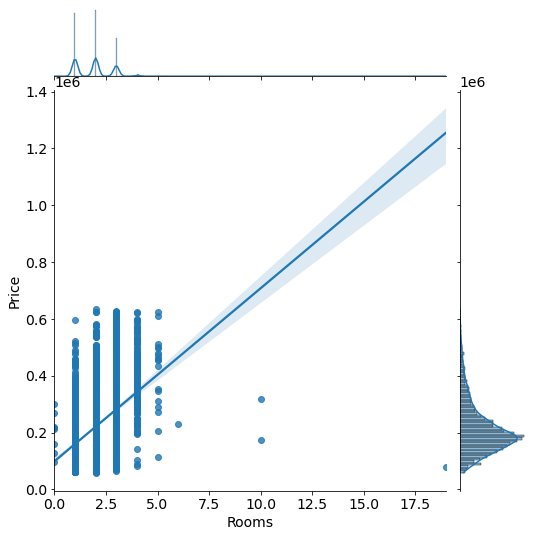

In [15]:
grid = sns.jointplot(train_df['Rooms'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

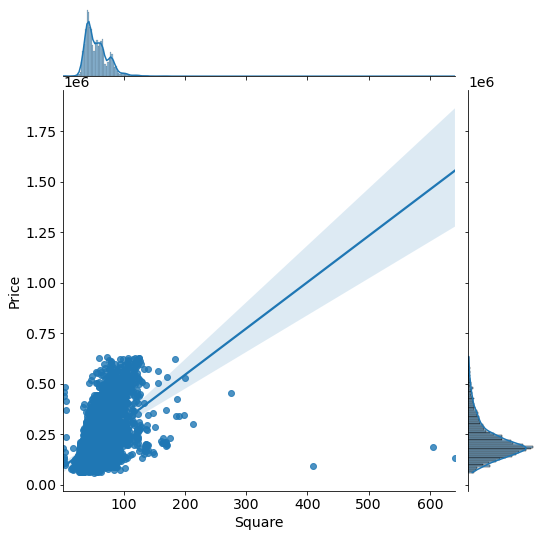

In [16]:
grid = sns.jointplot(train_df['Square'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

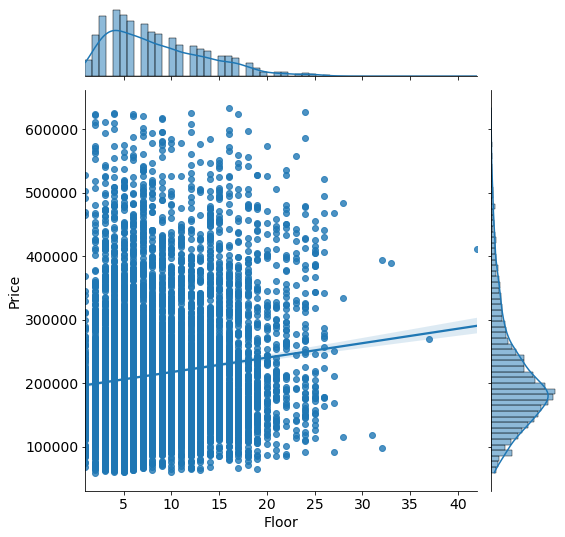

In [17]:
grid = sns.jointplot(train_df['Floor'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

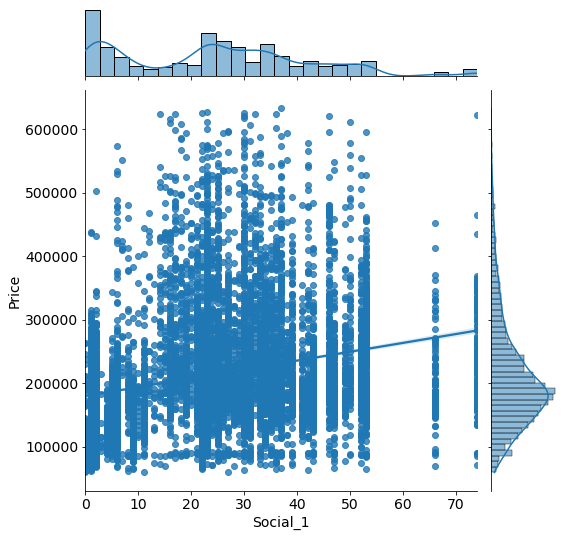

In [18]:
grid = sns.jointplot(train_df['Social_1'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

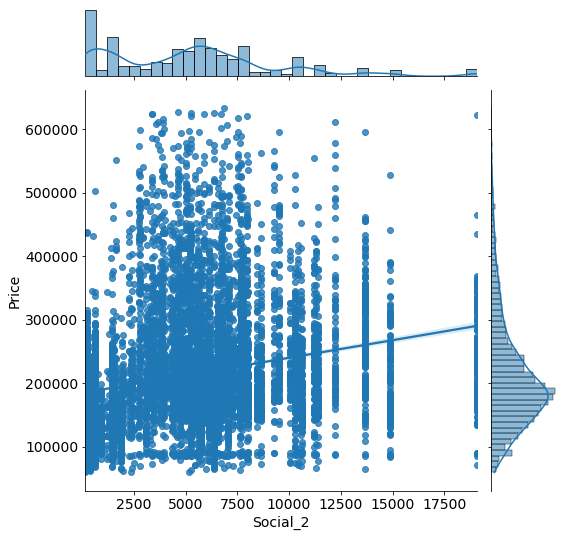

In [19]:
grid = sns.jointplot(train_df['Social_2'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

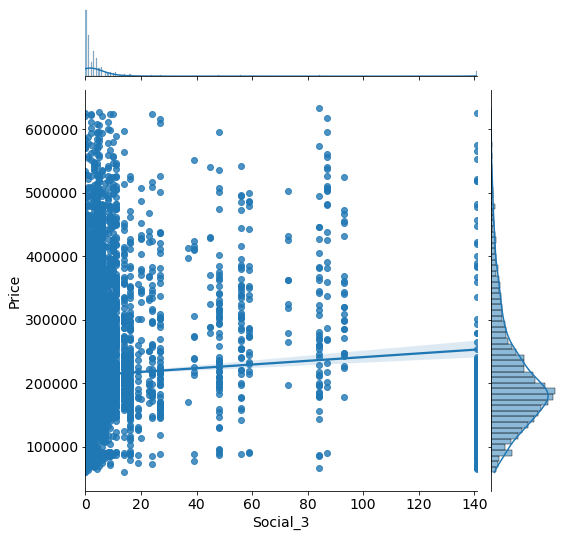

In [20]:
grid = sns.jointplot(train_df['Social_3'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

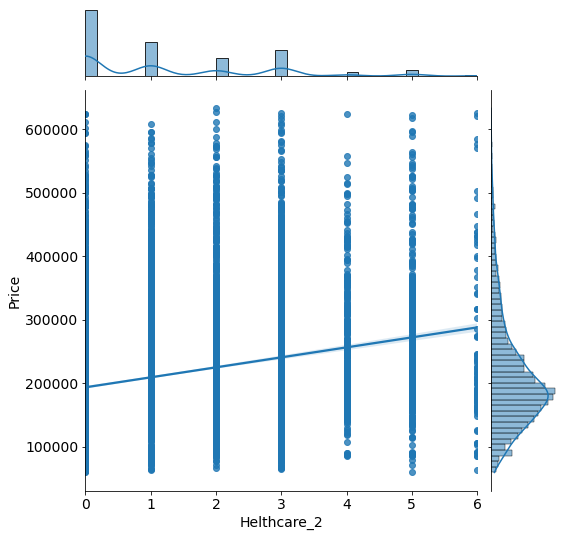

In [21]:
grid = sns.jointplot(train_df['Helthcare_2'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

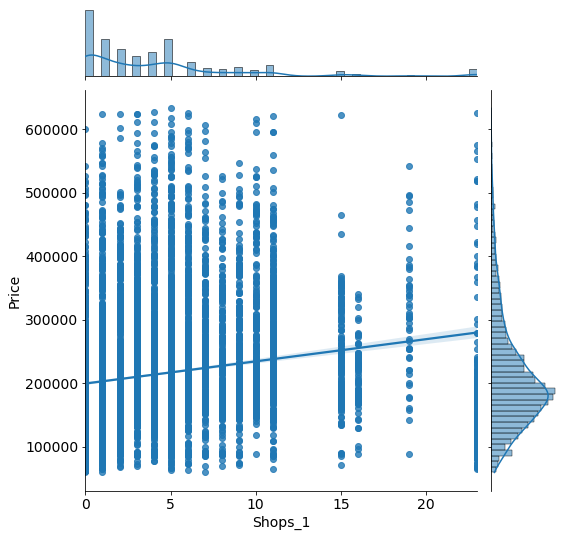

In [22]:
grid = sns.jointplot(train_df['Shops_1'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

По графикам выявлены явные зависимости от количества комнат и общей площади квартиры. Расположение (идентификационный номер района) тоже влияет на стоимость, но не так явно как вышеуказанные признаки.

Построим матрицу корреляций.

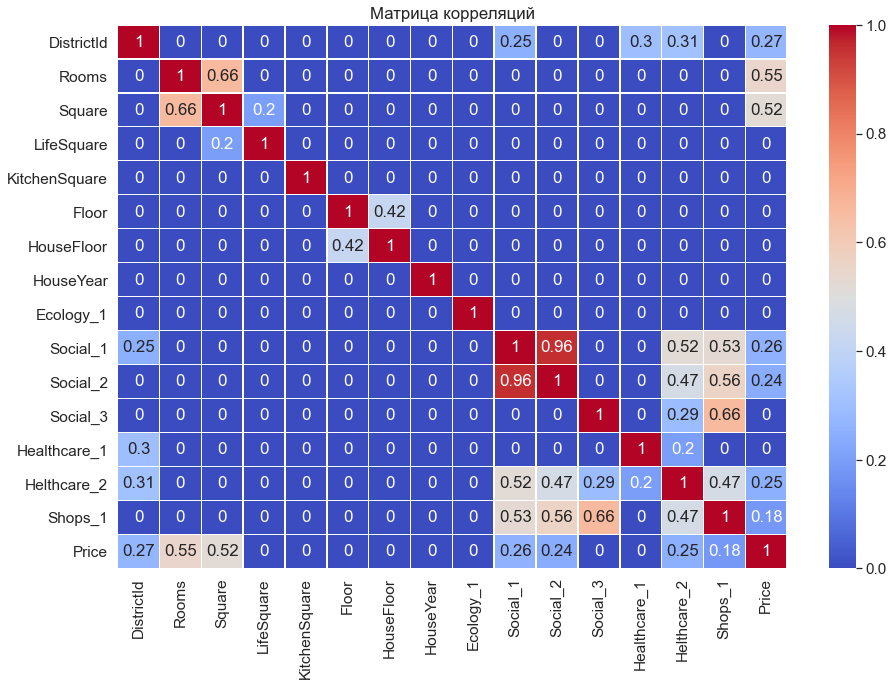

In [23]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.18] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.show()

На матрице выявилась корреляция этажа от этажности дома.

Приступим к обработке выбросов и пропусков.

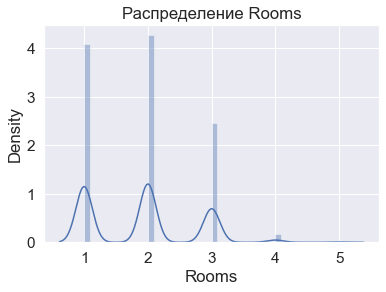

In [24]:
# Обработаем выбросы и нулевые значения комнат
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] > 5, 'Rooms'] = train_df['Rooms'].median()

# посмотрим распределение
sns.distplot(train_df['Rooms'])
plt.title('Распределение Rooms')
plt.show()

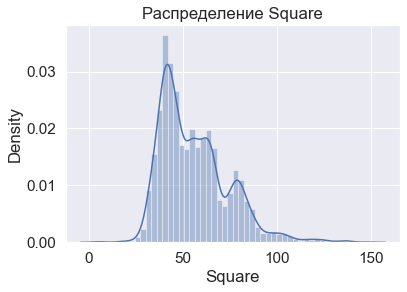

In [25]:
# рассчитаем служебные медианы
median_s = train_df['Square'].median()
median_ks = train_df['KitchenSquare'].median()
median_ls = train_df['LifeSquare'].median()

# Уберем объекты площадью меньше 4 и больше 150. Урежем хвосты и околонулевые значения
train_df.loc[train_df['Square'] > 150, 'Square'] = train_df['Square'].median()
train_df.loc[train_df['Square'] < 4, 'Square'] = train_df['Square'].median()

# посмотрим распределение
sns.distplot(train_df['Square'])
plt.title('Распределение Square')
plt.show()

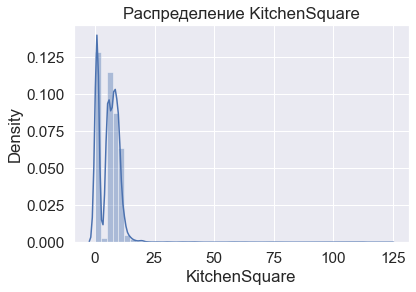

In [26]:
# Почистим значения KitchenSquare которые больше Square
# Определим коэффициент отношения площади кухни к общей площади
k_median_ks = train_df['KitchenSquare'].median() / train_df['Square'].median()

# исправим площадь кухни
train_df.loc[(train_df['KitchenSquare'] > train_df['Square']), 'KitchenSquare'] = k_median_ks * train_df['Square']

sns.distplot(train_df['KitchenSquare'])
plt.title('Распределение KitchenSquare')
plt.show()

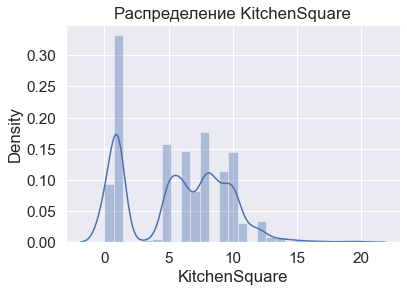

In [27]:
# Уберем хвост из площадей больше 20
train_df.loc[train_df['KitchenSquare'] > 20, 'KitchenSquare'] = train_df['KitchenSquare'].median()

sns.distplot(train_df['KitchenSquare'])
plt.title('Распределение KitchenSquare')
plt.show()

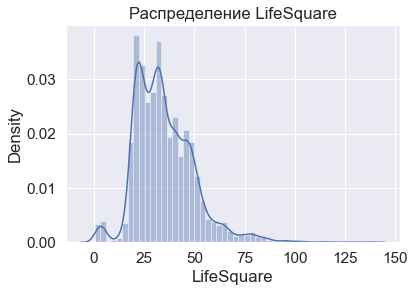

In [28]:
#Исправим пропуски LifeSquare как произведение общей площади на коэффциент жилой площади от общей
k_median_ls = train_df['LifeSquare'].median() / train_df['Square'].median()
train_df.loc[(train_df['LifeSquare'] > train_df['Square']) | 
             (train_df['LifeSquare'].isna()), 'LifeSquare'] = k_median_ls * train_df['Square']

sns.distplot(train_df['LifeSquare'])
plt.title('Распределение LifeSquare')
plt.show()

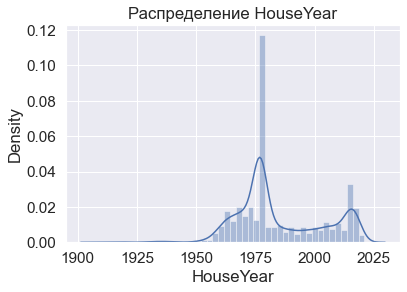

In [29]:
# изменим год постройки на текузий год, если он больше, чем текущая дата
now = datetime.datetime.now()
train_df.loc[(train_df['HouseYear'] > now.year), 'HouseYear'] = now.year

sns.distplot(train_df['HouseYear'])
plt.title('Распределение HouseYear')
plt.show()

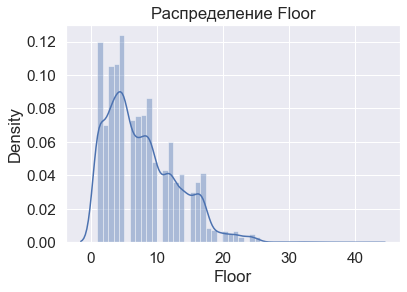

In [30]:
# обработаем нулевые этажи
train_df.loc[(train_df['Floor'] == 0), 'Floor'] = 1
train_df.loc[(train_df['HouseFloor'] == 0), 'HouseFloor'] = 1

# обработаем ситуацию когда этаж больше этажности
train_df.loc[(train_df['Floor'] > train_df['HouseFloor']), 'Floor'] = train_df['HouseFloor']

sns.distplot(train_df['Floor'])
plt.title('Распределение Floor')
plt.show()

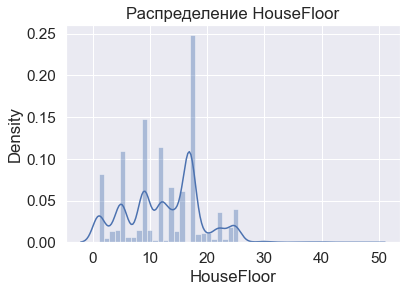

In [31]:
# Уберем хвост из наблюдений, где этажность больше 50. Их всего 3
train_df.loc[(train_df['HouseFloor'] > 50), 'HouseFloor'] = train_df['HouseFloor'].median()

sns.distplot(train_df['HouseFloor'])
plt.title('Распределение HouseFloor')
plt.show()

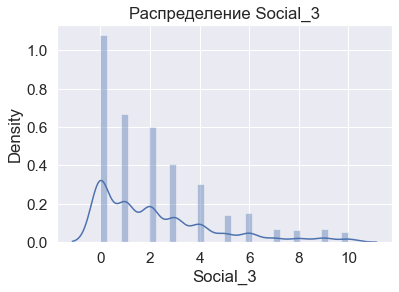

In [32]:
# Из ранее опредеденных параметров выровняем количество человек в квартире
train_df.loc[(train_df['Social_3'] > 10), 'Social_3'] = train_df['Social_3'].median()

sns.distplot(train_df['Social_3'])
plt.title('Распределение Social_3')
plt.show()

In [33]:
# Удалим столбец
train_df.drop('Healthcare_1', axis=1, inplace=True)

In [34]:
print(train_df.isna().sum())

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64


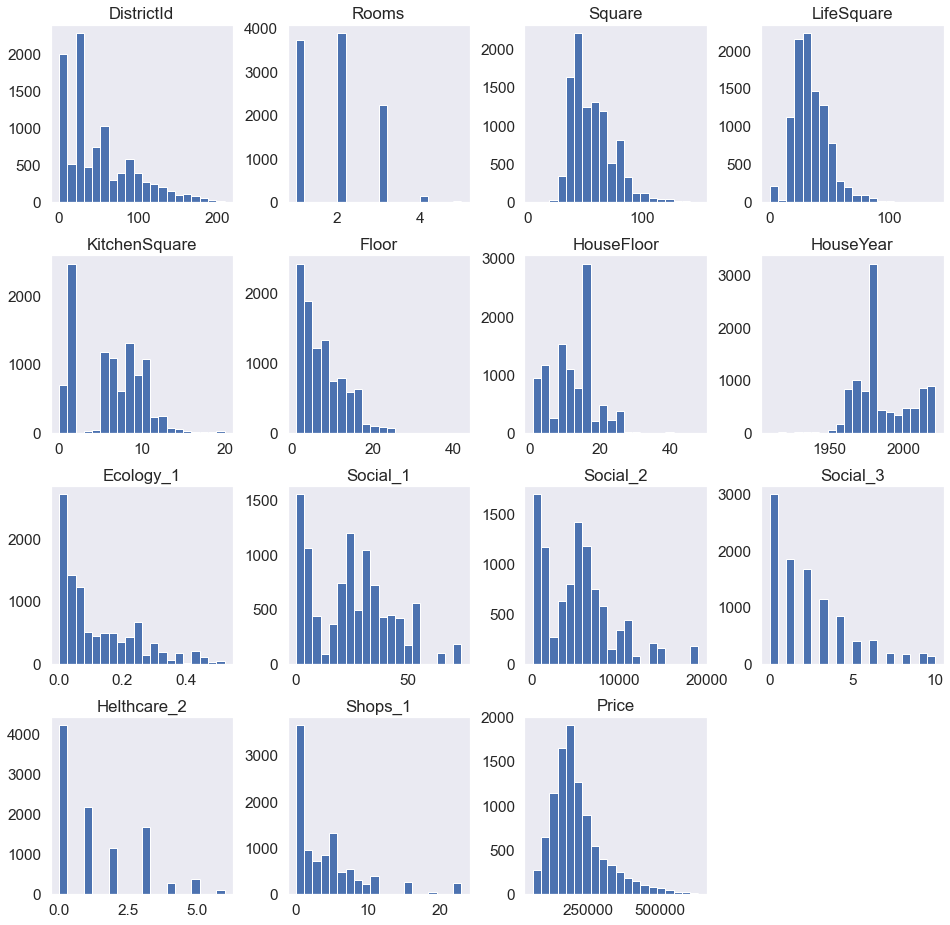

In [35]:
train_df.hist(figsize=(16,16), bins=20, grid=False)
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)
plt.show()

Номинативные признаки

In [36]:
# Заменим буквенные значения на числовые
litera = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(litera)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(litera)
train_df['Shops_2'] = train_df['Shops_2'].replace(litera)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,71.805603,10.0,4.0,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850
3,2352,1,1.0,40.409907,25.225816,1.0,10.0,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962


Классы подготовки данных

In [37]:
class dataPrepare:

    def __init__(self):
        self.medians = None  # сохраним все медианы
        self.k_median_ks = None  # переменная для коэфициента медиан 
        
    def fit(self, X):
        self.medians = X.median()  # Расчет медиан
    
    def transform(self, X):
        # Обработаем выбросы и нулевые значения Rooms
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] > 5, 'Rooms'] = self.medians['Rooms']

        # Уберем объекты площадью меньше 4 и больше 150. Урежем хвосты и околонулевые значения
        X.loc[X['Square'] > 150, 'Square'] = self.medians['Square']
        X.loc[X['Square'] < 4, 'Square'] = self.medians['Square']

        # Почистим значения KitchenSquare которые больше Square
        # Определим коэффициент отношения площади кухни к общей площади
        k_median_ks =  self.medians['KitchenSquare'] / self.medians['Square']

        # исправим площадь кухни
        X.loc[(X['KitchenSquare'] > X['Square']), 'KitchenSquare'] = k_median_ks * X['Square']

        # Уберем хвост из площадей больше 20
        X.loc[X['KitchenSquare'] > 20, 'KitchenSquare'] = self.medians['KitchenSquare']

        # Исправим пропуски LifeSquare как произведение общей площади на коэффциент жилой площади от общей
        k_median_ls = self.medians['LifeSquare'] / self.medians['Square']
        X.loc[(X['LifeSquare'] > X['Square']) | 
             (X['LifeSquare'].isna()), 'LifeSquare'] = k_median_ls * X['Square']
        
        # изменим год постройки на текузий год, если он больше, чем текущая дата
        now = datetime.datetime.now()
        X.loc[(X['HouseYear'] > now.year), 'HouseYear'] = now.year

        # обработаем нулевые этажи
        X.loc[(X['Floor'] == 0), 'Floor'] = 1
        X.loc[(X['HouseFloor'] == 0), 'HouseFloor'] = 1

        # обработаем ситуацию когда этаж больше этажности
        X.loc[(X['Floor'] > X['HouseFloor']), 'Floor'] = X['HouseFloor']
        X.loc[X['HouseFloor'] > 50, 'HouseFloor'] = self.medians['HouseFloor']

        # Из ранее определенных параметров выровняем количество человек в квартире
        X.loc[(X['Social_3'] > 10), 'Social_3'] = self.medians['Social_3']

        # Удалим признак Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        X.fillna(self.medians, inplace=True)
        
        return X


class dataDummies():
    
    def __init__(self):
        self.binary_to_numbers = None
        
    def fit(self):
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
    def transform(self, X):
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        return X

Функция для подсчета метрики

In [38]:
def r2_metrics(y_tr, y_vl, y_tr_prd, y_vl_prd):
    # Посчитаем коэффициент детерминации R2
    print("R2 TRAIN:\t" + str(r2_score(y_tr, y_tr_prd)))
    print("R2 TEST:\t" + str(r2_score(y_vl, y_vl_prd)))

    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(y_tr_prd, y_tr)
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Тренировочные значения')
    plt.title('Тренировочные предсказания')
    
    plt.subplot(122)
    sns.scatterplot(y_vl_prd, y_vl)
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Валидационные значения')
    plt.title('Валидационные предсказания')
    plt.show()

Разбиение на train и test

In [39]:
# Импортируем данные
train_df = pd.read_csv(TRAIN_DATASET_PATH)
X_test = pd.read_csv(TEST_DATASET_PATH)

# Создадим объекты классов и проинициализируем переменные
d_prepare = dataPrepare()
d_dummies = dataDummies()
d_prepare.fit(X_test)
d_dummies.fit()

# Подготовим данные
train_df = d_prepare.transform(train_df)
train_df = d_dummies.transform(train_df)
X_test = d_prepare.transform(X_test)
X_test = d_dummies.transform(X_test)

# Отделим целевую переменную
X = train_df.drop('Price', axis=1)
y = train_df['Price']

# Создадим тренировочные и валидацонные наборы
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

# Посмотрим на размерности и пропуски в данных. После обработки их не должно быть
print(X_train.shape, X_valid.shape, X_test.shape)
print(X_train.isna().sum().sum(), 
      X_valid.isna().sum().sum(),
      X_test.isna().sum().sum())

(6700, 18) (3300, 18) (5000, 18)
0 0 0


Построение модели

R2 TRAIN:	0.5567542089738065
R2 TEST:	0.5606389097635001


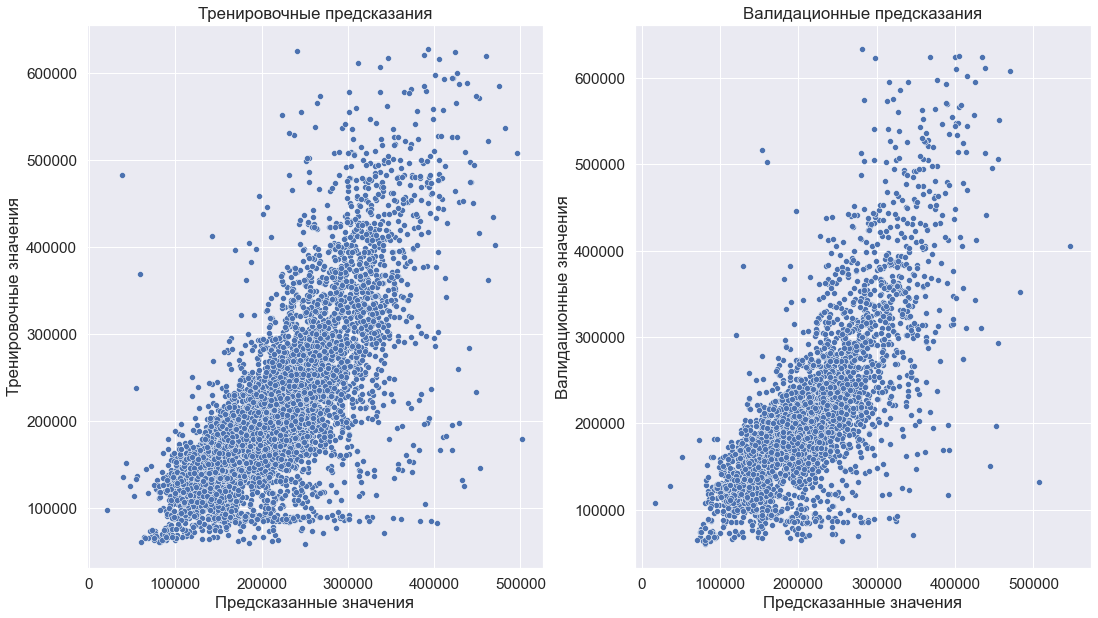

In [40]:
# # Построим модель линейной регрессии и обучим ее

# lr = LinearRegression()
# lr.fit(X_train, y_train)

# # Предскажем целевую переменную на валидационном наборе

# y_train_pred_lr = lr.predict(X_train)
# y_valid_pred_lr = lr.predict(X_valid)

# r2_metrics(y_train, y_valid, y_train_pred_lr, y_valid_pred_lr)

# R2 TRAIN:	0.5567542089738065
# R2 TEST:	0.5606389097635001

Сразу видно, что коэффициент детерминации не дотягивает до минимального значения 0.6 по заданию курсового проекта. Такая модель нам не подойдет.

R2 TRAIN:	0.891309674293204
R2 TEST:	0.7150090412977261


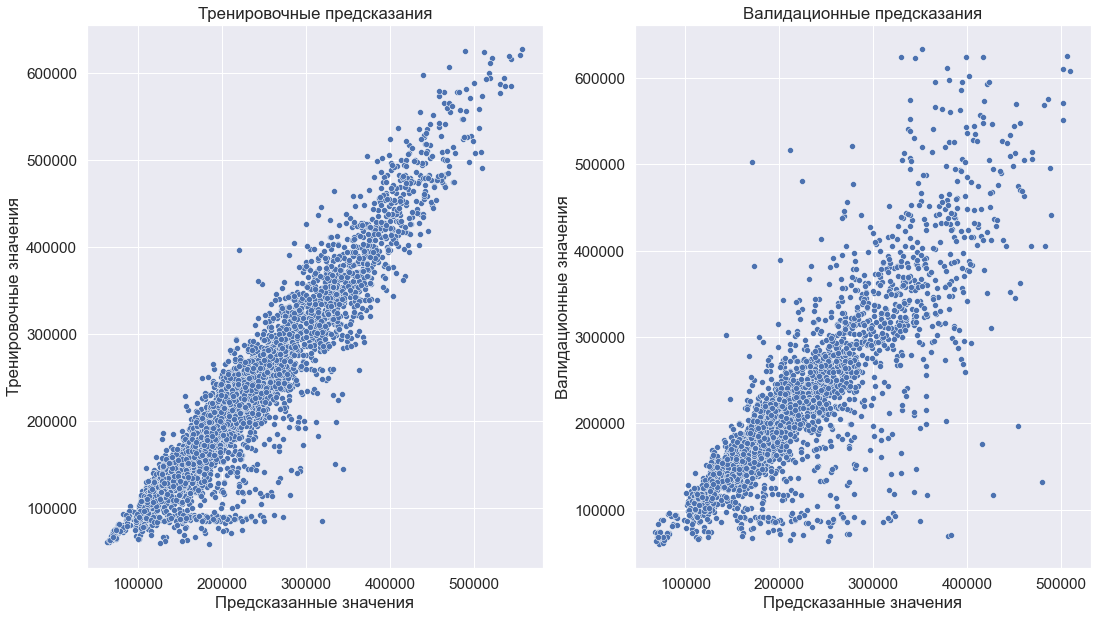

In [41]:
# parameters = [{'n_estimators': [200, 250, 300], 
#                 'max_features': np.arange(3, 8),
#                 'max_depth': np.arange(9, 13)}]

# from sklearn.model_selection import GridSearchCV

# gcv = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
#                     param_grid = parameters,
#                     scoring = 'r2',
#                     cv = 3,
#                     n_jobs=-1,)

# gcv.fit(X_train, y_train)
# gcv.best_params_

# rfr = RandomForestRegressor(n_estimators=250, max_features=7, max_depth=12, random_state=100, criterion='mse')
# rfr.fit(X_train, y_train)
# y_train_pred_rf = rfr.predict(X_train)
# y_valid_pred_rf = rfr.predict(X_valid)

# r2_metrics(y_train, y_valid, y_train_pred_rf, y_valid_pred_rf)

# R2 TRAIN:	0.891309674293204
# R2 TEST:	0.7150090412977261

               importance
feature                  
Square           0.272814
Rooms            0.132126
Social_2         0.097562
LifeSquare       0.091526
Social_1         0.085228
DistrictId       0.054570
KitchenSquare    0.043085
Social_3         0.042578
Ecology_1        0.041302
HouseYear        0.035118
Shops_1          0.024267
HouseFloor       0.023614
Helthcare_2      0.020444
Id               0.017454
Floor            0.015864
Ecology_3        0.000947
Shops_2          0.000871
Ecology_2        0.000631


<AxesSubplot:xlabel='feature'>

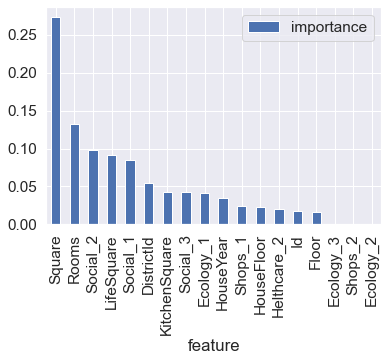

In [42]:
imp = pd.DataFrame({'feature': X_train.columns,'importance': rfr.feature_importances_})
imp = imp.sort_values('importance', ascending=False).set_index('feature')

print(imp)

imp.plot.bar()

С применением RandomForestRegressor разрыв между R2 TRAIN и R2 VALID развыв составил более 17%, что говорит о сильном переобучении модели.

In [43]:
scaler = RobustScaler()

colnames = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=colnames)


gbr = GradientBoostingRegressor(criterion='mse',
                                        max_depth=4,
                                        random_state=42,  
                                        n_estimators=350)

gbr.fit(X_train_scaled, y_train)
# gbr.fit(X_train, y_train) худший результат
# criterion='friedman_mse' R2 TEST:	0.7245146557887134
# criterion='mse'          R2 TEST:	0.7242174387179734
# criterion='mae'          R2 TEST:	0.7249950096145386

GradientBoostingRegressor(criterion='mse', max_depth=4, n_estimators=350,
                          random_state=42)

R2 TRAIN:	0.8972425862731869
R2 TEST:	0.7242174387179734


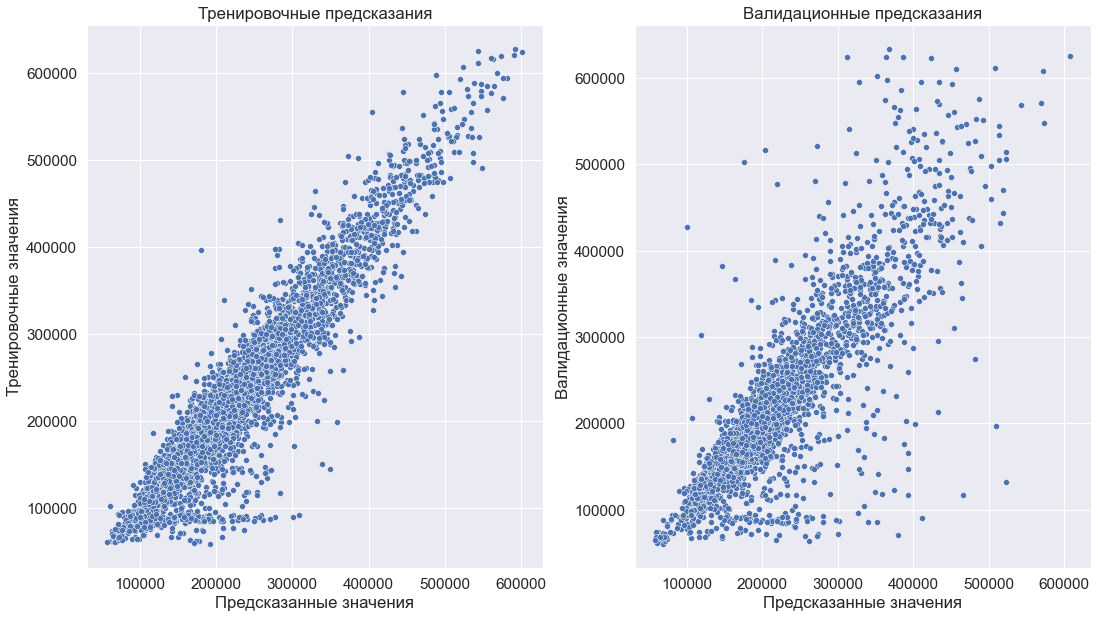

In [44]:
y_train_preds_gbr = gbr.predict(X_train_scaled)
y_valid_preds_gbr = gbr.predict(X_valid_scaled)

r2_metrics(y_train, y_valid, y_train_preds_gbr, y_valid_preds_gbr)

# R2 TRAIN:	0.8972425862731869
# R2 TEST:	0.7242174387179734

# y_train_preds_gbr = gbr.predict(X_train)
# y_valid_preds_gbr = gbr.predict(X_valid)

# r2_metrics(y_train, y_valid, y_train_preds_gbr, y_valid_preds_gbr)

# R2 TRAIN:	0.8972425862731869
# R2 TEST:	0.7243148825392058

               importance
feature                  
Square           0.407977
Social_2         0.095794
Social_1         0.089073
DistrictId       0.077015
Rooms            0.063870
Social_3         0.056585
Ecology_1        0.051664
HouseYear        0.039211
KitchenSquare    0.027940
HouseFloor       0.025202
Shops_1          0.016930
LifeSquare       0.015061
Id               0.013461
Helthcare_2      0.009749
Floor            0.008765
Ecology_3        0.000842
Shops_2          0.000798
Ecology_2        0.000062


<AxesSubplot:xlabel='feature'>

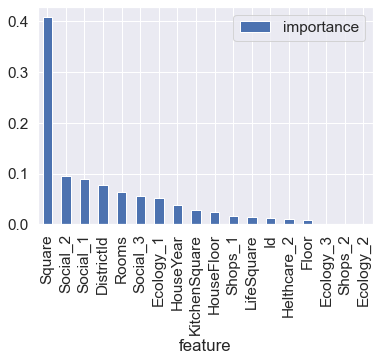

In [45]:
imp = pd.DataFrame({'feature': X_train_scaled.columns,'importance': gbr.feature_importances_})
imp = imp.sort_values('importance', ascending=False).set_index('feature')

print(imp)

imp.plot.bar()

По итогам метод GradientBoostingRegressor показал себя значительно лучше, по сравнению с LinearRegression и RandomForestRegressor. Однако он зацикливается на значении Square. Так же замечено, что критерий "mae" (средняя абсолютная ошибка) значительно увеличивает время обучения модели (обучение модели длится более 10 минут и выходит за рамки задания), но одновременно немного улучшает коэффициент детерминации на тестовых данных. Было принято решение остановиться на критерии mse.


Прогнозирование на тестовом датасете

In [46]:
# Снова для чистоты импортируем данные
X_train = pd.read_csv(TRAIN_DATASET_PATH)
X_test = pd.read_csv(TEST_DATASET_PATH)

# Создадим объекты классов и проинициализируем переменные
d_prepare = dataPrepare()
d_dummies = dataDummies()
d_prepare.fit(X_test)
d_dummies.fit()

# Подготовим данные
X_train = d_prepare.transform(X_train)
X_train = d_dummies.transform(X_train)
X_test = d_prepare.transform(X_test)
X_test = d_dummies.transform(X_test)

# Отделим целевую переменную
X = X_train.drop('Price', axis=1)
y = X_train['Price']

# Посмотрим на размерности и пропуски в данных. После обработки их не должно быть
print(X.shape, X_test.shape)
print(X.isna().sum().sum(), 
      X_test.isna().sum().sum())

(10000, 18) (5000, 18)
0 0


In [47]:
final_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=4,
                                        random_state=42,  
                                        n_estimators=350)

final_model.fit(X, y)

y_train_preds_gbr = final_model.predict(X)
y_test_preds_gbr = final_model.predict(X_test)

In [48]:
submit = pd.read_csv(SUBMIT_DATASET_PATH)
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [49]:
submit['Price'] = y_test_preds_gbr
submit.head()

,Id,Price
0,4567,158316.425741
1,5925,116060.870154
2,960,147020.213688
3,3848,127445.254526
4,746,202039.736933


In [51]:
submit.to_csv('gbr_submit.csv', index=False, sep=',')